# Data Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(f'train set size: {x_train.shape}')
print(f'test set size: {x_test.shape}')

train set size: (50000, 32, 32, 3)
test set size: (10000, 32, 32, 3)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
y_train = tf.one_hot(y_train, depth=10)

### Showing an image:

Text(0.5, 1.0, 'truck')

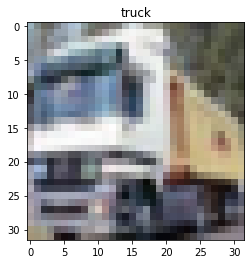

In [6]:
plt.imshow(x_train[1])
max_arg = tf.math.argmax(y_train[1], 1)
plt.title(class_names[int(max_arg)])

In [7]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [8]:
y_train.shape

TensorShape([50000, 1, 10])

In [9]:
y_train = y_train.reshape(50000, 10)

In [10]:
y_train.shape

TensorShape([50000, 10])

In [11]:
x_train.shape

(50000, 32, 32, 3)

### Validation set:

In [12]:
x_val = x_train[:1000]
y_val = y_train[:1000]

In [13]:
y_train[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### Useful variables

In [14]:
image_shape = (32,32,3)
BATCH_SIZE = 64

# A Simple ANN model:

In [15]:
def create_ann_model():
  model = tf.keras.Sequential([
                               Flatten(input_shape=image_shape),
                               Dense(400, activation='relu'),
                               Dropout(0.1),
                               Dense(120, activation='relu'),
                               Dense(60, activation='relu'),
                               Dense(10, activation='softmax')
])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model


In [16]:
model_0 = create_ann_model()
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 400)               1229200   
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               48120     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 1,285,190
Trainable params: 1,285,190
Non-

In [17]:
history_0 = model_0.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=BATCH_SIZE, epochs=10)

Epoch 1/10
782/782 [==============================] - 6s 3ms/step - loss: 12.5608 - accuracy: 0.1045 - val_loss: 2.3023 - val_accuracy: 0.1120
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 2.3056 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3042 - accuracy: 0.0995 - val_loss: 2.3023 - val_accuracy: 0.1030
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3035 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3033 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3032 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.1030
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3032 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.0990
Epoch

# EarlyStopping Callback

In [18]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience=3, mode='min')

In [19]:
history_1 = model_0.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=BATCH_SIZE, epochs=10, callbacks=[es_callback])

Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 2.3045 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.0920
Epoch 3/10
782/782 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0990
Epoch 4/10
782/782 [==============================] - 3s 3ms/step - loss: 2.3041 - accuracy: 0.0969 - val_loss: 2.3027 - val_accuracy: 0.0990


# Using ConvNets

In [20]:
def create_cnn_model():
  model = tf.keras.Sequential([
                             Conv2D(16, 3, activation='relu', input_shape=image_shape),
                             Dropout(0.1),
                             Conv2D(32, 3, activation='relu'),
                             Dropout(0.2),
                             MaxPooling2D((2,2)),
                             Flatten(),
                             Dense(10, activation='softmax')
])
  # adam = tf.keras.optimizers.Adam(learning_rate=...)   # Default value of learning rate is 0.001
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [21]:
# Uncomment and run following code if you don't specify input shape in the first layer of a model.
# model.build((None, 32, 32, 3))

In [22]:
cnn_model_0 = create_cnn_model()
cnn_model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                      

In [23]:
history_2 = cnn_model_0.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 13s 5ms/step - loss: 4.5456 - accuracy: 0.3728 - val_loss: 1.4238 - val_accuracy: 0.5100
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3638 - accuracy: 0.5244 - val_loss: 1.2002 - val_accuracy: 0.6030
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2418 - accuracy: 0.5658 - val_loss: 1.1062 - val_accuracy: 0.6280
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1753 - accuracy: 0.5893 - val_loss: 1.0548 - val_accuracy: 0.6320
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1308 - accuracy: 0.6066 - val_loss: 1.0730 - val_accuracy: 0.6310
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1024 - accuracy: 0.6180 - val_loss: 0.9971 - val_accuracy: 0.6530
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0684 - accuracy: 0.6270 - val_loss: 0.9885 - val_accuracy: 0.6870
Epoch

## LearningRateScheduler:

In [24]:
def scheduler(epoch, lr):
   if epoch < 2:
     return lr
   elif epoch < 5:
     return lr * tf.math.exp(0.1)
   else: 
     return lr * 0.3

In [25]:
lr_callback_1 = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [26]:
history_3 = cnn_model_0.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=BATCH_SIZE, epochs=10, callbacks=[lr_callback_1])

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9832 - accuracy: 0.6605 - val_loss: 0.8471 - val_accuracy: 0.7060 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9695 - accuracy: 0.6622 - val_loss: 0.8231 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9773 - accuracy: 0.6583 - val_loss: 0.8475 - val_accuracy: 0.7090 - lr: 0.0011
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9874 - accuracy: 0.6540 - val_loss: 0.8483 - val_accuracy: 0.7070 - lr: 0.0012
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0280 - accuracy: 0.6419 - val_loss: 1.5227 - val_accuracy: 0.4720 - lr: 0.0013
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8438 - accuracy: 0.7020 - val_loss: 0.6740 - val_accuracy: 0.7600 - lr: 4.0496e-04
Epoch 7/10
782/782 [==============================] - 4s 5ms/step 

# Making the model more robust:

In [27]:
sample = x_train[0]
print(f' sample data type: {sample.dtype}')
print(f' Min value of sample: {sample.min()}, Max value of sample: {sample.max()}')

 sample data type: uint8
 Min value of sample: 0, Max value of sample: 255


## Normalization

In [28]:
x_train_norm , x_test_norm = x_train / 255, x_test / 255
x_val_norm = x_val / 255

In [29]:
new_sample = x_train_norm[0]
print(f' new_sample data type: {new_sample.dtype}')
print(f' Min value of new_sample: {new_sample.min()}, Max value of new_sample: {new_sample.max()}')

 new_sample data type: float64
 Min value of new_sample: 0.0, Max value of new_sample: 1.0


In [30]:
def create_bcnn_model():
  model = tf.keras.Sequential([
                              Conv2D(32, 3, activation='relu', input_shape=image_shape),
                              Conv2D(64, 3, activation='relu'),
                              Conv2D(64, 3, activation='relu'),
                              Flatten(),
                              Dense(60, activation='relu'),
                              Dense(10, activation='softmax')
])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [31]:
cnn_model_1 = create_bcnn_model()
cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 43264)             0         
                                                                 
 dense_5 (Dense)             (None, 60)                2595900   
                                                                 
 dense_6 (Dense)             (None, 10)                610       
                                                                 
Total params: 2,652,830
Trainable params: 2,652,830
No

In [32]:
history_4 = cnn_model_1.fit(x_train_norm, y_train, validation_data=(x_val_norm, y_val), batch_size=BATCH_SIZE, epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5591 - accuracy: 0.4348 - val_loss: 1.1173 - val_accuracy: 0.5970
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.0413 - accuracy: 0.6370 - val_loss: 0.8976 - val_accuracy: 0.6870
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8529 - accuracy: 0.7043 - val_loss: 0.6498 - val_accuracy: 0.7830
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7102 - accuracy: 0.7543 - val_loss: 0.5187 - val_accuracy: 0.8240
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5536 - accuracy: 0.8093 - val_loss: 0.3762 - val_accuracy: 0.8830
Epoch 6/10
782/782 [==============================] - 7s 10ms/step - loss: 0.4070 - accuracy: 0.8591 - val_loss: 0.2497 - val_accuracy: 0.9260
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2720 - accuracy: 0.9086 - val_loss: 0.2001 - val_accuracy: 0.9380
Epoc

In [33]:
lr_callback_2 = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [35]:
cnn_model_2 = create_bcnn_model()
history_5 = cnn_model_2.fit(x_train_norm, y_train, validation_data=(x_val_norm, y_val), batch_size=BATCH_SIZE, epochs=10, callbacks=[lr_callback_2])

Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 1.4272 - accuracy: 0.4872 - val_loss: 1.0637 - val_accuracy: 0.6080 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 1.0051 - accuracy: 0.6467 - val_loss: 0.8499 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8478 - accuracy: 0.7032 - val_loss: 0.6880 - val_accuracy: 0.7710 - lr: 0.0011
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7151 - accuracy: 0.7508 - val_loss: 0.5155 - val_accuracy: 0.8350 - lr: 0.0012
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5862 - accuracy: 0.7953 - val_loss: 0.3991 - val_accuracy: 0.8720 - lr: 0.0013
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3051 - accuracy: 0.8985 - val_loss: 0.1847 - val_accuracy: 0.9450 - lr: 4.0496e-04
Epoch 7/10
782/782 [==============================] - 7s 9ms/ste